In [1]:
# Detect houghlines from the field image

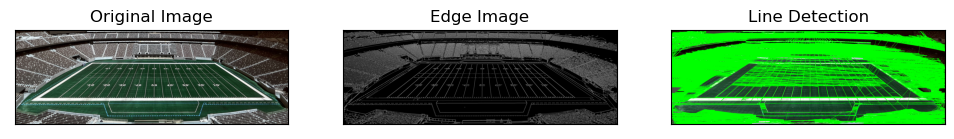

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image, grayscale, Gaussian blur, Otsu's threshold
image = cv2.imread('./assets/field_crop.jpeg')
original = image.copy()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)

# Perform edge detection
edged = cv2.Canny(blur, 50, 200, 255)

# Perform Hough Line Transform
lines = cv2.HoughLinesP(edged, 1, np.pi/180, 10, minLineLength=10, maxLineGap=100)

# Draw lines on the detected points
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image, (x1,y1), (x2,y2), (0,255,0), 2)

# plot the image in matplotlib
plt.figure(figsize=(12,10))
plt.subplot(131), plt.imshow(original)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(edged, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(image)
plt.title('Line Detection'), plt.xticks([]), plt.yticks([])
plt.show()